# Probability theory

:::{admonition} What you need to know

- **Sample space** $\Omega$ is a set of elementary outcomes or events.
- **Events** can contain more than one elementary event and can be constructed by forming subsets ($A$, $B$, $C$ etc) of $\Omega$ 
- **Probability function** P(A) assigns a numeric value to each event, A quantifying certainty of an event happening on a 0-1 scale. 
- **Venn diagrams** visualize P(A) as a "volume fraction" of our confidence in the event expressed on 0-1 scale.
- **Probability axioms** define a set of logical rules for creating composite events from trivial ones.
- **Bayesian approach:** In physical sciences and modeling one often deals with situations where counting is impossible. Hence, probability is interpreted as a degree of belief.
:::

In [8]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

### Sample space

- The **sample space**, often signified by an $\Omega$ is a set of **all possible elementary events**. Elementary means the events can not be further broken down into simpler events. For instance, rolling a die can result in any one of six elementary events.

- In the context of statistical mechanics, we are going to call states inside $\Omega$ **microstates**. States of $\Omega$ are sampled during a system trial, which could be done via an experiment or simulation. 

#### Examples of Samples spaces

-  If our trial is a single roll of a six-sided die, then the sample space will be:

$$\Omega =\{1, 2, 3, 4, 5, 6 \}$$

- A fair coin is tossed once 

$$\Omega = \{H, T \}$$

- If a fair coin is tossed three times in a row, we will have sample space of size $2^3$ (HTT, THT, TTH, THH, HTH, HHT, HHH, TTT) 

$$\Omega = \{H,T\}^{3}$$

- Position of an atom in a container of size $L_x$ along x. There will be a huge number of  

$$\Omega = \{0... L_x\}$$ 

### Events

- An **Event** specifies the outcome of a trial. Generally an event can contain one or more elementary events from $\Omega$.
  
- In the contact of statistical mechanics we will refer to events containing multiple microstates as **Macrostates**. 

#### Examples of events

- If we roll a die we can choose event to be getting a single number

$$A= \{1 \}$$

- Or we can choose event to be any even number: 

$$B = \{2, 4, 6 \}$$

- A macrostate of a nitrogen molecule could be all positions of molecule in second half of container

$$C  = \{L/2, ..., L \} $$


### Compute probabilities through counting 

We calculate probabilities of events as fractions in the sample space that events take up.

$$
\boxed{\Large P(A) = \frac{n(A)}{n(\Omega)}}
$$

- $n(A)$ probability of event, e.g rolling an even number. The size of the event space is 3
- $n(\Omega)$ size of sample space. In the context of single die roll is equal 6

In [1]:
def probability(Omega={1,2}, A={1}):
    '''
    Compute the probability of event A given sample set Omega.
    '''
    
    return len(A)/len(Omega)

In [2]:
S={1,2,3,4,5,6,7,8,9,10}
E= {1, 4, 8} 
probability(S,E)

0.3

In [3]:
S={1,2,3,4,5,6,7,8,9,10}
E= {1,4,5, 7} 
probability(S,E)

0.4

### Composite events and Venn diagrams

In [5]:
%%capture
!pip install matplotlib-venn #install if running locally
import matplotlib_venn as venn

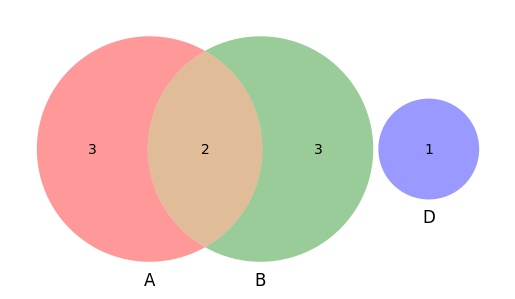

In [10]:
Omega = {-1, 0, 1, 2, 3,4,5,7, 20, 90}

A = {1, 2, 3,4,5}

B = {0, 2, -1, 5,7}

C = {20, 90, 0}

D = {90}

venn.venn3([A, B, D], set_labels=('A','B', 'D'))

#### Creating new events

In [5]:
print("𝐴∩𝐵 = ", A&B)

print("𝐴∪B = ", A|B)    

print("𝐴-B = ", A-B)     

print("A^c = ", len(Omega-A))

print("B^c = ", len(Omega-B))

print("(𝐴∪𝐵)^c = ", len(Omega-(𝐴|𝐵)))

print("𝐴^c ∩ B^c = ", len((Omega-A)&(Omega-B)))

𝐴∩𝐵 =  {2, 5}
𝐴∪B =  {0, 1, 2, 3, 4, 5, 7, -1}
𝐴-B =  {1, 3, 4}


### Probability Axioms

:::{admonition} Nonnegativity
:class: tip 
 
For every event *A*, 
 
$$P(A) \ge 0$$
:::

:::{admonition} Normalization
:class: tip 
 
The probability of the entire sample space is equal to 1.
 
$$P(\Omega)=1$$
:::

:::{admonition} Addition rule
:class: tip 
 
For any sequence of **disjoint** events, $A_i \cap A_j = \emptyset $, the probability of their union is the sum of their probabilities,
 
$$P\left( A_1 \cup A_2 \cup \ldots \right) = P\left(A_1\right) + P\left(A_2\right) + \ldots$$
::: 


:::{admonition} Product rule
:class: tip 
 
For every event *A*, 
 
$$P(A,B,C)=P(A)P(B)P(C)$$
::: 

:::{admonition} Complement
:class: tip 
 
Given that $A \cap \bar A=\emptyset$ and $A \cup \bar A=\Omega$.
 
 $$P(\bar A)=1-P(A)$$
:::
 
:::{admonition} Conditional probability and Bayes Theorem
:class: tip 
 
Knowledge of past events may change the probability of future events
 
$$P(A,B)=P(A|B)P(B)=P(B|A)P(A)$$
::: 

::::{admonition} Example

We roll two dice and record the total sum of numbers $T$. Suppose event $A$ is getting a total of $T = 9$ and event $B$ is getting a total of $T = 5$. What is the probability of A or B?

:::{dropdown}  
A and B cannot both occur. The two events are mutually exclusive. There are four ways to get event A
(T = 9), and 4 ways to get event B (T = 5), so that there are 4 + 4 = 8 ways to get
either A or B, and so $P(A or B) = 8/36$
:::
::::

::::{admonition} Example
Suppose event C is getting a total of $T = 12$ and event D is getting a double, where both dice are the same. What is the probability of C or D?

:::{dropdown}  

There is only one way to get 12, so P(C) = 1/36. There are six ways to get a double,
so P(D) = 6/36. However, C and D are not exclusive—rolling a double six is an
example of both. The double six is already included in the P(D) calculation. So
P(C or D) = 6/36 + 1/36 − 1/36 = 6/36
:::

::::

### Joint, marginal and conditional probability

-  **Joint Probability $P(A, B)$**  Quantifies the probability of two or more events happening simultaneously.

- **Marginal Probability $P(A)$**  Quantifies the probability of an event irrespective of the outcomes of other random variables. Is obtained by marginalization, summing over all possibilities of B.

$$P(A) = P(A, B) + P(A, B^c)$$

- **Conditional Probability $P(A | B)$**  Quantifies probability of event A given the information that event B happened.

$$P(B | A) = \frac{P(B, A)}{P(A)}$$

$$P(A, B) = P(B | A) \cdot  P(A)$$

- We are counting the fraction of A and B overlap confined within the given event A

- Note that joint probability is symmetric $P(A, B) = P(B, A)$ while conditional probability is not! $P(A | B) != P(B | A)$


![](./figs/bayes.png)

### Bayes formula

**Prior, posterior and likelihood**

- The Bayes theorem provides a powerful way to test hypotheses and learn the parameters of a model from data. The jargon used when using the bayes formula differs slightly from the one given above.

$$P(H|D) = \frac{P(D|H) \cdot P(H) }{P(D)}$$

- $P(H)$ is called **prior** and quantifies information we have about our hyothesis. 
- $P(D)$ is called **evidence** and is just the probability of having the date we generated.
- $P(D|H)$ is called likelihood of data! It is not called probability because one is interested in how different values of $H$ change the $P(D|H)$. 
- $P(H|D)$ is the quantity we are after is called called **posterior**

:::{admonition} Example 

- A test for cancer is known to be 90% accurate either in detecting cancer if present or in giving an all-clear if cancer is absent.
- The prevalence of cancer in the population is 1%.
How worried should you be if you test positive? Try answering this question
using Bayes’ theorem.

:::{dropdown}  Solution

- Accuracy of a test (how often positives show up when cancer is certain)

$$P(+|X) = 0.9 \\ P(-|X^c)=0.9$$

- Only 1% of the population has cancer; hence, we get the probability of an individual having (not having) cancer as:

$$P(X)=0.01\,\,\,\,hence\,\,\,\,\,\,\, P(X^c)=1-P(X)=0.99$$

- Now we have all terms to compute $p(X|+)$ probability of disease given the positive test. 

$$P(X|+) = \frac{P(+|X)p(X)}{p(+)} = \frac{P(+|X)p(X)}{p(+|X)p(X)+p(+| X^c)p(X^c)} =  \frac{0.9\cdot 0.01}{0.9\cdot 0.01+0.1\cdot 0.99} = 0.083$$

:::

:::{admonition} **Exercise**
:class: attention

A second test is done, and you test positive again. Calculate $P(X|+, ++)$, which you can do by noting that tests are independent; hence 

$$P(++, +|X)= P(++|X, +)\cdot P(+|X) = P(++|X)\cdot P(+|X)$$

- The Bayes formula allows you to update probabilities with the emergence of new data easily!
:::

### Combinatorics

- Combinatoric expressions are helpful for computing the size of events and answering questions such as "How many ways can molecules arrange in this or that way?"
- If you are given **n molecules in a jar**, **you have r ways of sampling them**. You get different answers depending on whether molecules are distinguishable and whether sampling is done with or without replacement. 

Sampling   | Combinatorics
--   |   --
**Ordered** sampling **without** replacement       |  $\boxed{P^n_r = \frac{n!}{(n-r)!}}$
**Unordered** sampling **without** replacement  |  $\boxed{C^n_r = \frac{n!}{r!(n-r)!}}$
**Ordered** sampling **with** replacement          | $\boxed{P^n_r = r^n}$  |    |  
**Unordered** sampling **with** replacement  |  $\boxed{P^n_r = \frac{(n+r-1)!}{r!(n-1)!}}$


#### Multinomial combination.

The combinatorial formula can be readily generalized for k>2 partitions. A classic problem we will encounter is partitioning $N$ indistinguishable molecules among $n_1$ energy level, $n_2$, ... $n_k$. $\sum n_i = N$

$$\boxed{C^N_{n_1,n_2,...n_k}=\frac{N!}{n_1! \cdot n_2! \cdot ... n_k!} }$$

````{admonition} Example: gas atoms

Consider a container filled with 1000 atoms of Ar.

```{dropdown} What is the probability that the left half has 400 atoms?
$n(A) = \frac{1000!}{400! \cdot 600 !}$
```

```{dropdown} What is the probability that the left half has 500 atoms?
$n(B) = \frac{1000!}{500! \cdot 500 !}$
```

```{dropdown} What is a probability that 1/3 has 100 next 1/3 has 200 and next 1/3 has 700?
 $n(C) = \frac{1000!}{100!\cdot 200! \cdot 700!}$
```

```{dropdown} What is the total number of all possible partitionings or states of gas atoms in a container?
$n(S) = \sum^{n=N}_{n=0}\frac{N!}{n!\cdot (N-n)!} = 2^N$ 
Each N lattice site in the container can be vacant or filled with $2^N$ states. 
```

````

````{admonition} **Example: spins**

Solid metal has 100 atoms. Magnetic measurements show that there are 10 atoms with spin down. If ten atoms are chosen at random, what is the probability that they all have spin up? 

```{dropdown} Solution


$$n(S) = \frac{100!}{10!(90)!}$$

$$n(up) = \frac{90!}{10!(80)!}$$

$$p(up) =\frac{n(up)}{n(S)}$$
```

````

In [55]:
def gas_partition(k1=30, k2=30, k3=30):
    '''partitioning N gas molecules into regions k1, k2 and k3'''

    from scipy.special import factorial

    N = k1+k2+k3 

    return factorial(N) / (factorial(k1) * factorial(k2)* factorial(k3))

print( gas_partition(k1=50, k2=50, k3=0) )

print( gas_partition(k1=50, k2=47, k3=3) )


1.0089134454556417e+29
1.977470353093058e+33


:::{admonition} **Exercise**
:class: attention

Plot how a number of configurations resulting from portioning molecules of gas into two regions depends on the ratio of molecules in compartments
:::

### Permutations and combinations in python

- [itertools](https://docs.python.org/3/library/itertools.html) module of python as the name may suggest provides tools for building complex iterations. 
- For instance itertoosl has functions for obtaining all possible permutations and combinations of two objects; two lists or strings for instance.  

In [13]:
from itertools import permutations, combinations, combinations_with_replacement

#Try out different methods, sequence and combination numbers
seq = 'ABCD'
n   = 2

print('Permuations')
[print(p) for p in permutations(seq, n)];

print('Combinations')
[print(p) for p in combinations(seq, n)]; 

print('Combinations with replacement')
[print(p) for p in combinations_with_replacement(seq, n)] ;

Permuations
('A', 'B')
('A', 'C')
('A', 'D')
('B', 'A')
('B', 'C')
('B', 'D')
('C', 'A')
('C', 'B')
('C', 'D')
('D', 'A')
('D', 'B')
('D', 'C')
Combinations
('A', 'B')
('A', 'C')
('A', 'D')
('B', 'C')
('B', 'D')
('C', 'D')
Combinations with replacement
('A', 'A')
('A', 'B')
('A', 'C')
('A', 'D')
('B', 'B')
('B', 'C')
('B', 'D')
('C', 'C')
('C', 'D')
('D', 'D')


### Random variables 

- **A random variable X** is a quantitative variable whose value depends on the outcomes of a random phenomenon. $X$ is a function from possible outcomes of a sample space $\Omega$. For a coin toss $\Omega={-1,1}$ and one possible X(H)=+1 and X(T)=-1. Every time the experiment is done, X returns either +1 or -1. We could also make functions of random variables, e.g., every time X=+1, we earn 10$, etc. 
-  Random variables are classified into two main types: **discrete and continuous.**

**Discrete Random Variable:** It assumes a countable number of distinct values. Discrete random variables are used to model scenarios where outcomes can be counted, such as the number of particles emitted by a radioactive source in a given time interval or the number of photons hitting a detector in a certain period.

**Continuous Random Variable:** It can take any value within a continuous range. These variables describe quantities that can vary smoothly, such as the position of a particle in space, the velocity of a molecule in a gas, or the energy levels of an atom.

### Probability distribution of random variable

- For any random variable X, we are interested in finding probability distribution over possible values x that X takes: $p(x)$.
- Note the very subtle but crucial difference between x (1-6 for a die) and a random variable X, which generates numbers x according to distributions p(x)


#### Normalization
  
$$\int p(x)dx = 1$$

#### Expectation 

- $E[x]$ is the theoretical or exact value of the mean instead of the sample mean, which we compute in simulations and hope it is close to expectation.

$$E[x]  = \int x \cdot p(x)dx$$

$$E[f(x)] = \int f(x) \cdot p(x)dx$$

- We see that expectation is always a linear operator in the sense that $E[f+g] = E[f]+E[g]$

#### Variance (fluctuation)

Variance is an expectation of squared deviation of x from expectation, which characterizes the spread in values of x.

$$V[x] = E[(x-E[x])^2 ] = E[x^2]-E[x]^2$$ 

- We see that Variance, in general, is not a linear operator in the sense that $V[f+g] \neq V[f]+V[g]$. 

### Random numbers in python

- The [**numpy.random**](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) has the fastest random number generators based on low-level code written in C. 
- The [**Scipy.stats**](https://docs.scipy.org/doc/scipy/reference/stats.html ) has an extensive library of statistical distributions and tools for statistical analysis.

- First, we take a look at the most widely used random numbers of numpy, also called standard random numbers. These are rand (uniform random number on interval 0,1) and randn (stnadard average random number with 0 mean and 1 variance). 

- When running code that uses random numbers results will always differ for every run. If you want code to reproduce the same result, you can fix the seed to get reproducible results: ``` np.random.seed(8376743)```

In [ ]:
X = np.random.rand(10)

In [ ]:
Y = np.random.randn(100)

### Probability distributions

In [10]:
def rnplot(r):
    '''Convenience function for making quick two-panel plot showing 
    a line plot for the sequence of random numbers (RN)
    a histogram plot of the probability density of random numbers 
    '''
    
    fig, ax = plt.subplots(ncols=2) 

    ax[0].plot(r,  color='blue', label='trajectory')
    ax[1].hist(r,  density=True, color='red',  label = 'histogram')
    
    
    ax[0].set_xlabel('Samples of RN')
    ax[0].set_ylabel('Values of RN')
    
    ax[1].set_xlabel('Values of RN')
    ax[1].set_ylabel('Probability Density')

    fig.legend();
    fig.tight_layout()

### Uniform

$$p(x| a, b)=\begin{cases}
{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b
\end{cases}
$$

In [ ]:
r = np.random.rand(200) 

rnplot(r)

### Binomial

$$P(n |r, N) =  \frac{N!}{(N-n)! n!}r^n (1-r)^{N-n}$$

In [ ]:
r = np.random.binomial(n=10, p=0.6, size=2000) 

rnplot(r)

### Gaussian

$$P(x |\mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In [ ]:
# For a standard normal with sigma=1, mu=0
r = np.random.randn(200)

# For a more general Gaussian
rgauss = np.random.normal(loc=2., scale=5, size=200) 

rnplot(r)

### Poisson

$$P(n| \lambda) = \frac{\lambda^n e^{-\lambda}}{n!}$$

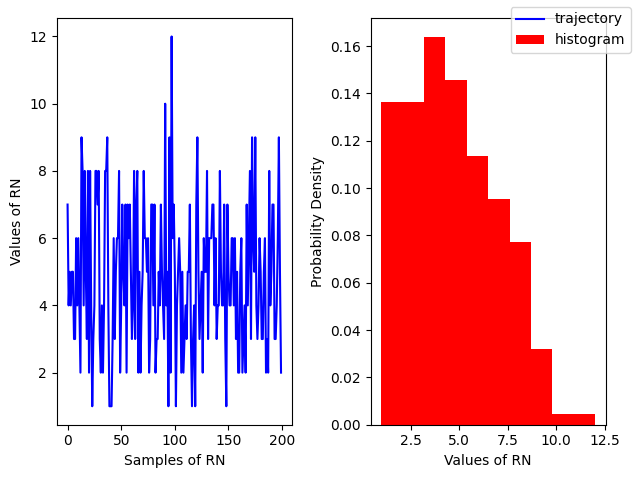

In [12]:
# For a standard normal with sigma=1, mu=0
r = np.random.poisson(5, 200) 

rnplot(r)

### Plotting exact probability distributions

- [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) contains a large number of probability distributions. Explores examples there

In [13]:
from scipy.stats import binom, norm, poisson

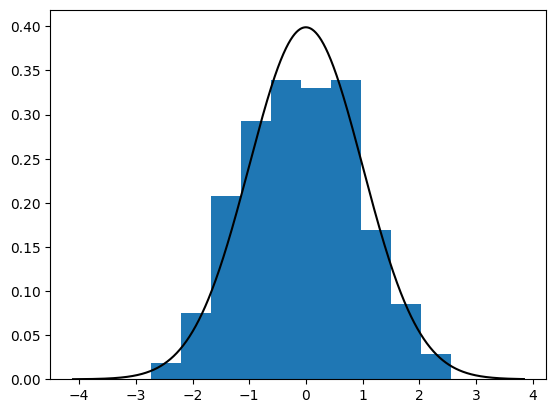

In [27]:
r = np.random.randn(200)
plt.hist(r, density=True);

x = np.linspace(1.5*r.min(), 1.5*r.max(), 1000)
plt.plot(x, norm.pdf(x),'k', label='norm pdf')

### Using random numbers to get answers via simulations 

One of the major uses of random numbers is for conducting numerical simulations. What is a simulation? It is a recreation of a process on a computer. And this recreation is done by random numbers. E.g to simulate coint tosses, die throws, diffusion of molecules, conformational change of polymers we use random number to recreate the process on a computer. Let's start off by asking some simple questions

- How often do we get a run of 5 or more consecutive heads in 100 coin tosses if we repeat the experiment 1000 times?
- What if the coin is biased to generate heads only 40% of the time?

We will use ```np.random.choice``` which generates random samples from limited options. 

```python
np.random.choice(a, size, p, replace=True)
```
- ```a:``` an array/list of choices like, ```[-1, 1]``` or ```[1, 2, 3]``` or ```['bagel', 'muffin']```
- ```p:``` probabilities of picking choices from a. E.g ```p=[0.5, 0.5]```. Default is equal probabilities.
- ```size:``` shape of an array could be ```N, (N,M), (N,M,Q)``` etc
- ```replace=True.``` If you choose bagel from a, the caffee will put back a new one on shelf.

In [ ]:
n = 100    # length of each trajectory
N = 1      # number of experiments: stochastic trajecotries generated

xs = np.random.choice([0,1], size=(n, N)) # (i) Unbiased coin p=[0.5,0.5] by default

ys = np.random.choice([0,1], size=(n, N), p=[0.9, 0.1])  # (ii) biased coin

plt.hist((xs[:,0], ys[:,0]), 2, label = ("unbiased", "biased"))
plt.legend()

### Exercises

**Events, sets, probability**

Consider an experiment with N equally likely outcomes, involving two events A and B. 
Let $N_1$ be the number of events in which A occurs but not B
Let $N_2$ be the number of events in which B occurs but not A
Let $N_3$ be the number of events in which both A and B occur
Let $N_4$ be the number of events in which Neither A nor B ocurs

1. Check that $\sum^{4}_{i=1} N_i=1$

2. What would be the expressions of $P(A)$ and $P(B)$ in terms of $N_i$?

3. What would be the expression of $P(A+B)$ in terms of $N_i$?

4. What would be the expression of $P(A|B)$ and $P(A|B)$ in terms of $N_i$?

5. Show that $P(A+B) = P(A) +cP(B) - P(AB)$ and $P(AB) = P(B)P(A|B) = P(A)P(B|A)$

**Die rolls**

- What is a probability of obtaining number=6 three times in a row when rolling three independent die at once? What about rolling same dice three times?

- What is a probability of obtaining a combined sum of 6 when rolling three die?

- On average, how many times ($\langle n \rangle$ ) must a 6-sided die be rolled until a 6 turns up? (Hint: we must compute average using n roles out of which n-1 did not turn out 6. $\langle n \rangle = \sum^{\infty}_n P(n) n)$


**Sock combinations**

A sock is selected at random and removed from a drawer containing five brown
socks and three green socks. A second random sock is then removed. What is the
probability that two different colors are selected?


### Problems

**Smart gambler.**
 
 You flip a coin 10 times and record the data in the form
of head/tails or 1s and 0s
-  What would be the probability of ladning 4 H's?
-  What would be the probability of landing HHHTTTHHHT sequence?
-  In how many ways can we have 2 head and 8 tails in this experiments?
-  Okay, now you got tired of flipping coins and decide to play some dice. You throw die
10 times what is the probability of never landing number 6?
- You throw a die 3 times what is the probability of obtaining a combined sum of 7?

**Practicing counting. Gas molecules.**

$$C^{N}_{k}$$

A container of volume $V$ contains $N$ molecules of a gas. We assume that the gas is dilute so that the position of any one molecule is independent of all other molecules. Although the density will be uniform on the average, there are fluctuations in the density. Divide the volume $V$ into two parts $V_1$ and $V_2$, where $V = V_1 + V_2$. 
- What is the probability p that a particular molecule is in each part? 
- What is the probability that $N_1$ molecules are in $V_1$ and $N_2$ molecules are in $V_2$? 
- What is the average number of molecules in each part? 
- What are the relative fluctuations of the number of particles in each part?

**Binomial, Gaussian and Poisson: The 3 distributions to know before heading to Las Vegas.**

- Show that in large number limit binomial distribution tends to gaussian. Show is by expanding binomial distirbution $logp(n)$ in power series showing that terms beyond quadratic can be ignored. 

- In the limit $N\rightarrow \infty$ but for very small values of $p \rightarrow 0$ such that $\lambda =pN=const$ there is another distribution that better approximates Binomial distribution: $p(x)=\frac{\lambda^k}{k!}e^{-\lambda} $ It is known as Poisson distribution. <br>
Poisson distribution is an excellent approximation for probabilities of rare events. Such as, infrequently firing neurons in the brain, radioactive decay events of Plutonium or rains in the desert. <br>  Derive Poisson distribution by taking the limit of $p\rightarrow 0$ in binomial distribution.

- Using numpy and matplotlib plot binomial probability distribution
against Gaussian and Poisson distributions for different values of N=(10,100,1000,10000). <br>
- For a value N=10000 do four plots with the following values 
p=0.0001, 0.001, 0.01, 0.1. You can use  subplot functionality to make a pretty 4 column plot. (See plotting module)

```python
fig, ax =  plt.subplots(nrows=1, ncols=4)
ax[0].plot()
ax[1].plot()
ax[2].plot()
ax[3].plot()
```

**Optional Project:** [Porosity of materials](https://en.wikipedia.org/wiki/Porosity)

A simple model of a porous rock can be imagined by placing a series of overlap- ping spheres at random into a container of fixed volume $V$ . The spheres represent the rock and the space between the spheres represents the pores. If we write the volume of the sphere as v, it can be shown the fraction of the space between the spheres or the porosity $\phi$ is $\phi =e^{-Nv/V}$, where $N$ is the number of spheres. 

For simplicity, consider a 2D system, (e.g $v=\frac{1}{4}\pi d^2$, see [wiki](https://en.wikipedia.org/wiki/Area_of_a_circle) if you forgot the formula). 
Write a python function which place disks of $d=1$ into a square box. The disks can overlap. Divide the box into square cells each of which has an edge length equal to the diameter of the disks. Find the probability of having 0, 1, 2, or 3 disks in a cell for $\phi$ = 0.03, 0.1, and 0.5.

> You will need [np.random.uniform()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.uniform.html) to randomly place N disks of volume v into volume V. 
> Check out this cool python lib for porosity evaluation of materials [R Shkarin, et al Plos Comp Bio 2019](https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0215137&type=printable)